# Example for Lift Analysis

In [1]:
from matplotlib import pyplot as plt
from wingstructure import data, aero
import numpy as np

## Definition of wing

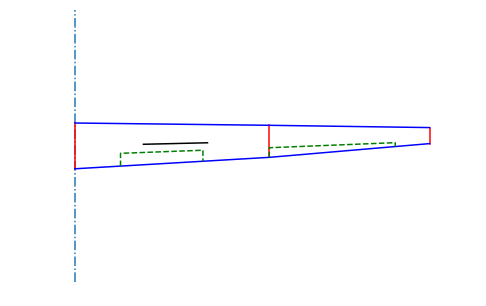

In [2]:
# create wing object
wing = data.Wing()

# add sections to wing
wing.add_section(data.Point(0.0, 0.0, 0.0), 1.0, 0.0)
wing.add_section(data.Point(0.05, 4.25, 0.0), 0.7, 0.0)
wing.add_section(data.Point(0.1, 7.75, 0.0), 0.35, 0.0)

# set fuselage with (=root of wing) to zero
wing.set_root_pos(0.0)

# define spoiler position
wing.set_spoiler(1.5, 2.9)

# define control-surfaces
wing.set_flap('flap', 1, 2.8,[0.7,0.7])
wing.set_flap('flap2', 4.25, 7, [0.7,0.8])

# display simple wing
plt.figure(figsize=(8,5))
wing.plot()
plt.savefig('wing.png')

## Define analysis object and calculate distributions

/home/jonathan/Programmieren/wingstructure/wingstructure/aero/analysis.py:33: UserWarning: No airfoil database defined, using default airfoil.
  warn('No airfoil database defined, using default airfoil.')




Base


Flap flap


Flap flap2


airbrake


aoa


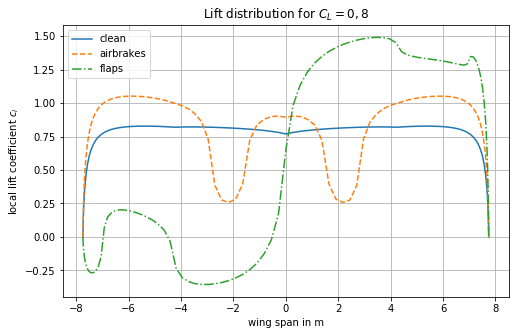

In [5]:
liftana = aero.LiftAnalysis(wing)

span_pos = liftana.calc_ys

α, distribution, C_Dib = liftana.calculate(C_L=0.8, return_C_Di=True)
α_qr, distribution_q, C_Dia = liftana.calculate(C_L=0.8, 
            flap_deflections={'flap2': [5, -15]}, return_C_Di=True)
α_ab, distribution_ab, C_Di = liftana.calculate(C_L=0.8, air_brake=True, return_C_Di=True)

plt.figure(figsize=(8,5))
plt.plot(span_pos, distribution, label='clean')
plt.plot(span_pos, distribution_ab, '--', label='airbrakes')
plt.plot(span_pos, distribution_q, '-.', label='flaps')
plt.xlabel('wing span in m')
plt.ylabel('local lift coefficient $c_l$')
plt.title('Lift distribution for $C_L = 0,8$')
plt.grid()
plt.legend()
plt.savefig('Liftdistribution.png')
plt.savefig('Liftdistribution.pdf')

In [4]:
from wingstructure.aero import multhop

In [5]:
res = multhop.calc_multhoplift(wing, 1.)

[0.03569992 0.07139983 0.10709975 0.14279967 0.17849958 0.2141995
 0.24989942 0.28559933 0.32129925 0.35699917 0.39269908 0.428399
 0.46409891 0.49979883 0.53549875 0.57119866 0.60689858 0.6425985
 0.67829841 0.71399833 0.74969825 0.78539816 0.82109808 0.856798
 0.89249791 0.92819783 0.96389775 0.99959766 1.03529758 1.0709975
 1.10669741 1.14239733 1.17809725 1.21379716 1.24949708 1.28519699
 1.32089691 1.35659683 1.39229674 1.42799666 1.46369658 1.49939649
 1.53509641 1.57079633 1.60649624 1.64219616 1.67789608 1.71359599
 1.74929591 1.78499583 1.82069574 1.85639566 1.89209558 1.92779549
 1.96349541 1.99919533 2.03489524 2.07059516 2.10629507 2.14199499
 2.17769491 2.21339482 2.24909474 2.28479466 2.32049457 2.35619449
 2.39189441 2.42759432 2.46329424 2.49899416 2.53469407 2.57039399
 2.60609391 2.64179382 2.67749374 2.71319366 2.74889357 2.78459349
 2.8202934  2.85599332 2.89169324 2.92739315 2.96309307 2.99879299
 3.0344929  3.07019282 3.10589274]


In [6]:
res['ys'].shape, liftana.calc_ys.shape, liftana.calc_ys-res['ys']

((87,),
 (87,),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]))

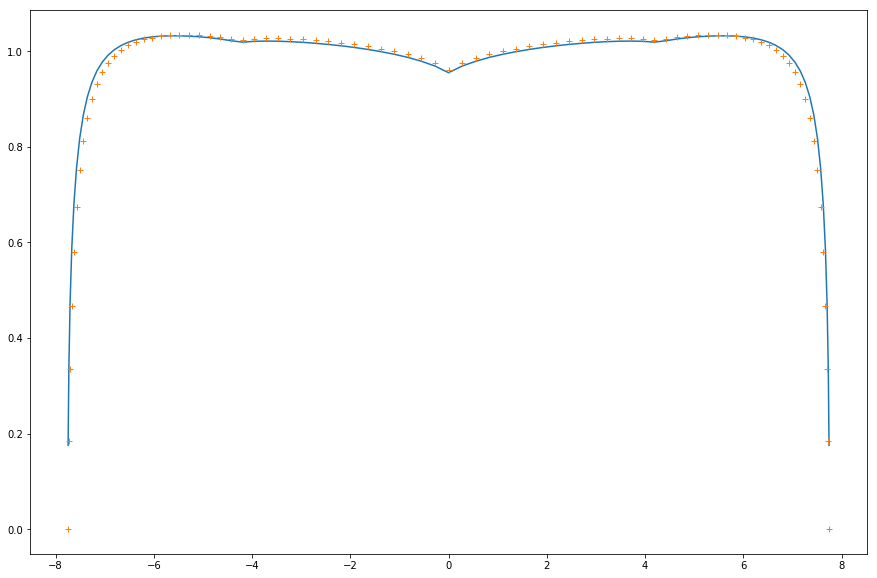

In [7]:
plt.figure(figsize=(15,10))
plt.plot(res['ys'], res['c_ls']/res['C_L'])
plt.plot(liftana.calc_ys, liftana.aoa_c_ls, '+')

In [8]:
distribution

array([3.70777457e-08, 1.46901193e-01, 2.67615993e-01, 3.73357240e-01,
       4.64227008e-01, 5.39267676e-01, 6.00532565e-01, 6.49751144e-01,
       6.89144319e-01, 7.20438438e-01, 7.45290634e-01, 7.64940795e-01,
       7.80480348e-01, 7.92710065e-01, 8.02313532e-01, 8.09786292e-01,
       8.15548594e-01, 8.19901143e-01, 8.23100280e-01, 8.25324466e-01,
       8.26726851e-01, 8.27405555e-01, 8.27442603e-01, 8.26872113e-01,
       8.25707937e-01, 8.23893025e-01, 8.21265986e-01, 8.19234266e-01,
       8.20901910e-01, 8.21505045e-01, 8.21449133e-01, 8.20860041e-01,
       8.19825135e-01, 8.18370035e-01, 8.16516283e-01, 8.14245953e-01,
       8.11543781e-01, 8.08349005e-01, 8.04602948e-01, 8.00169156e-01,
       7.94899977e-01, 7.88451410e-01, 7.80379122e-01, 7.69148643e-01,
       7.80379122e-01, 7.88451410e-01, 7.94899977e-01, 8.00169156e-01,
       8.04602948e-01, 8.08349005e-01, 8.11543781e-01, 8.14245953e-01,
       8.16516283e-01, 8.18370035e-01, 8.19825135e-01, 8.20860041e-01,
      